In [1]:
import tensorflow as tf
from tensorflow import keras

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, re

from sklearn.metrics import roc_auc_score

sys.path.append("./python/")
from tcr_utils import load_tcrs
from tcr_transformer import build_transformer_model

tokenizer = keras.preprocessing.text.Tokenizer(char_level=True, lower=False)
tokenizer.fit_on_texts('ARNDCEQGHILKMFPSTWYV')

2022-11-21 23:44:38.307680: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 23:44:38.312118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 23:44:38.312497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 240:
        lr *= 0.5e-3
    elif epoch > 180:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 60:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

# Prepare callbacks for model saving and for learning rate adjustment.
lr_scheduler = LearningRateScheduler(lr_schedule)

callbacks = [lr_scheduler]

In [3]:
# load train and test dataset
tcrs_train_n = load_tcrs("data/TrainingData/NormalCDR3.txt")
tcrs_train_t = load_tcrs("data/TrainingData/TumorCDR3.txt")
tcrs_test_n = load_tcrs("data/TrainingData/NormalCDR3_test.txt")
tcrs_test_t = load_tcrs("data/TrainingData/TumorCDR3_test.txt")

# encode TCRs as a sequence of integers to be used as input to the embedding layer
X_train = np.concatenate(
    [keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(tcrs_train_n), maxlen=20),
     keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(tcrs_train_t), maxlen=20)],
    axis=0)

y_train = np.concatenate(
    [np.zeros(len(tcrs_train_n)),
     np.ones(len(tcrs_train_t))])

X_test = np.concatenate(
    [keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(tcrs_test_n), maxlen=20),
     keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(tcrs_test_t), maxlen=20)],
    axis=0)

y_test = np.concatenate(
    [np.zeros(len(tcrs_test_n)),
     np.ones(len(tcrs_test_t))])

In [4]:
transformer_mod = build_transformer_model()

history = transformer_mod.fit(
    X_train, y_train,
    shuffle=True,
    batch_size=32,
    epochs=300,
    validation_data=(X_test, y_test),
    callbacks=callbacks)

2022-11-21 23:44:44.265608: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-21 23:44:44.266465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 23:44:44.266862: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 23:44:44.267190: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Learning rate:  0.001
Epoch 1/300
2182/2182 [==============================] - 23s 10ms/step - loss: 0.5634 - accuracy: 0.7087 - val_loss: 0.5375 - val_accuracy: 0.7291 - lr: 0.0010
Learning rate:  0.001
Epoch 2/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.5119 - accuracy: 0.7484 - val_loss: 0.4632 - val_accuracy: 0.7829 - lr: 0.0010
Learning rate:  0.001
Epoch 3/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.4994 - accuracy: 0.7550 - val_loss: 0.4490 - val_accuracy: 0.7920 - lr: 0.0010
Learning rate:  0.001
Epoch 4/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.4930 - accuracy: 0.7598 - val_loss: 0.4839 - val_accuracy: 0.7676 - lr: 0.0010
Learning rate:  0.001
Epoch 5/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.4853 - accuracy: 0.7654 - val_loss: 0.4349 - val_accuracy: 0.8005 - lr: 0.0010
Learning rate:  0.001
Epoch 6/300
2182/2182 [==============================] - 21s 10ms/st

Learning rate:  0.001
Epoch 46/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.3929 - accuracy: 0.8165 - val_loss: 0.3653 - val_accuracy: 0.8328 - lr: 0.0010
Learning rate:  0.001
Epoch 47/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.3897 - accuracy: 0.8195 - val_loss: 0.3706 - val_accuracy: 0.8318 - lr: 0.0010
Learning rate:  0.001
Epoch 48/300
2182/2182 [==============================] - 21s 9ms/step - loss: 0.3903 - accuracy: 0.8186 - val_loss: 0.3693 - val_accuracy: 0.8323 - lr: 0.0010
Learning rate:  0.001
Epoch 49/300
2182/2182 [==============================] - 21s 9ms/step - loss: 0.3906 - accuracy: 0.8177 - val_loss: 0.3637 - val_accuracy: 0.8347 - lr: 0.0010
Learning rate:  0.001
Epoch 50/300
2182/2182 [==============================] - 21s 9ms/step - loss: 0.3883 - accuracy: 0.8189 - val_loss: 0.3667 - val_accuracy: 0.8352 - lr: 0.0010
Learning rate:  0.001
Epoch 51/300
2182/2182 [==============================] - 21s 9ms/

2182/2182 [==============================] - 21s 10ms/step - loss: 0.3209 - accuracy: 0.8552 - val_loss: 0.3459 - val_accuracy: 0.8477 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 91/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.3209 - accuracy: 0.8558 - val_loss: 0.3447 - val_accuracy: 0.8474 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 92/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.3194 - accuracy: 0.8564 - val_loss: 0.3414 - val_accuracy: 0.8494 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 93/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.3190 - accuracy: 0.8573 - val_loss: 0.3426 - val_accuracy: 0.8487 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 94/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.3194 - accuracy: 0.8570 - val_loss: 0.3454 - val_accuracy: 0.8474 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 95/300
2182/2182 [==============================] - 21s 10ms/step -

2182/2182 [==============================] - 21s 10ms/step - loss: 0.3010 - accuracy: 0.8653 - val_loss: 0.3386 - val_accuracy: 0.8524 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 134/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.3010 - accuracy: 0.8659 - val_loss: 0.3427 - val_accuracy: 0.8510 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 135/300
2182/2182 [==============================] - 22s 10ms/step - loss: 0.3016 - accuracy: 0.8657 - val_loss: 0.3403 - val_accuracy: 0.8521 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 136/300
2182/2182 [==============================] - 22s 10ms/step - loss: 0.3010 - accuracy: 0.8649 - val_loss: 0.3403 - val_accuracy: 0.8520 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 137/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.3021 - accuracy: 0.8654 - val_loss: 0.3420 - val_accuracy: 0.8513 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 138/300
2182/2182 [==============================] - 21s 10ms/step -

Learning rate:  1e-05
Epoch 177/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.2980 - accuracy: 0.8677 - val_loss: 0.3415 - val_accuracy: 0.8522 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 178/300
2182/2182 [==============================] - 22s 10ms/step - loss: 0.2988 - accuracy: 0.8664 - val_loss: 0.3417 - val_accuracy: 0.8519 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 179/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.3010 - accuracy: 0.8667 - val_loss: 0.3410 - val_accuracy: 0.8520 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 180/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.2997 - accuracy: 0.8660 - val_loss: 0.3387 - val_accuracy: 0.8530 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 181/300
2182/2182 [==============================] - 21s 10ms/step - loss: 0.2979 - accuracy: 0.8672 - val_loss: 0.3417 - val_accuracy: 0.8517 - lr: 1.0000e-05
Learning rate:  1e-06
Epoch 182/300
2182/2182 [=============

2182/2182 [==============================] - 22s 10ms/step - loss: 0.2977 - accuracy: 0.8659 - val_loss: 0.3406 - val_accuracy: 0.8524 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 221/300
2182/2182 [==============================] - 22s 10ms/step - loss: 0.2964 - accuracy: 0.8678 - val_loss: 0.3405 - val_accuracy: 0.8524 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 222/300
2182/2182 [==============================] - 22s 10ms/step - loss: 0.2968 - accuracy: 0.8675 - val_loss: 0.3406 - val_accuracy: 0.8523 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 223/300
2182/2182 [==============================] - 22s 10ms/step - loss: 0.2987 - accuracy: 0.8671 - val_loss: 0.3408 - val_accuracy: 0.8523 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 224/300
2182/2182 [==============================] - 22s 10ms/step - loss: 0.2995 - accuracy: 0.8671 - val_loss: 0.3407 - val_accuracy: 0.8523 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 225/300
2182/2182 [==============================] - 22s 10ms/step -

Learning rate:  5e-07
Epoch 264/300
2182/2182 [==============================] - 26s 12ms/step - loss: 0.2981 - accuracy: 0.8677 - val_loss: 0.3405 - val_accuracy: 0.8528 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 265/300
2182/2182 [==============================] - 26s 12ms/step - loss: 0.2994 - accuracy: 0.8665 - val_loss: 0.3405 - val_accuracy: 0.8527 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 266/300
2182/2182 [==============================] - 24s 11ms/step - loss: 0.2969 - accuracy: 0.8673 - val_loss: 0.3404 - val_accuracy: 0.8529 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 267/300
2182/2182 [==============================] - 26s 12ms/step - loss: 0.2983 - accuracy: 0.8683 - val_loss: 0.3404 - val_accuracy: 0.8528 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 268/300
2182/2182 [==============================] - 23s 11ms/step - loss: 0.2983 - accuracy: 0.8682 - val_loss: 0.3405 - val_accuracy: 0.8526 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 269/300
2182/2182 [=============

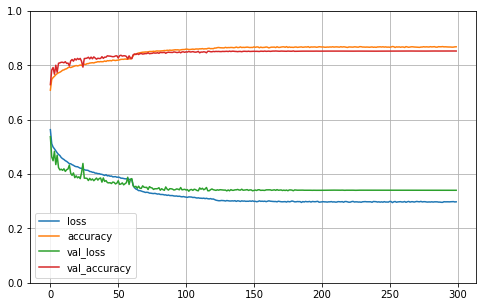

In [18]:
pd.DataFrame(history.history).drop("lr", axis=1).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,1)
#plt.savefig('figures/training.pdf')
plt.show()